In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

X = torch.linspace(1,50,50).reshape(-1,1)

In [3]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
#print(e.sum())

In [4]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


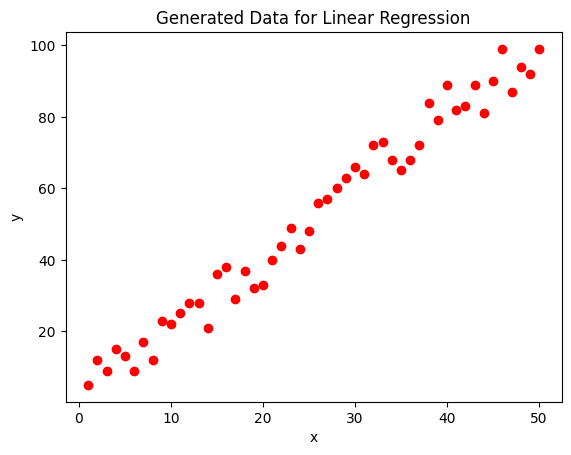

In [5]:

plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()


In [6]:



# Setting a manual seed for reproducibility
torch.manual_seed(59)

# Defining the model class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


# Creating an instance of the model
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [7]:
loss_function = nn.MSELoss()  # Mean Squared Error (MSE) loss

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


epochs = 50  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

epoch:  1  loss: 3057.21679688  weight: 3.33490014  bias: 1.06046367
epoch:  2  loss: 1588.53063965  weight: 1.01483285  bias: 0.99226284
epoch:  3  loss: 830.29992676  weight: 2.68179941  bias: 1.04252183
epoch:  4  loss: 438.85217285  weight: 1.48402131  bias: 1.00766504
epoch:  5  loss: 236.76144409  weight: 2.34460592  bias: 1.03396463
epoch:  6  loss: 132.42912292  weight: 1.72622538  bias: 1.01632178
epoch:  7  loss: 78.56572723  weight: 2.17050409  bias: 1.03025162
epoch:  8  loss: 50.75775909  weight: 1.85124576  bias: 1.02149546
epoch:  9  loss: 36.40123367  weight: 2.08060074  bias: 1.02903891
epoch: 10  loss: 28.98922920  weight: 1.91576838  bias: 1.02487016
epoch: 11  loss: 25.16238213  weight: 2.03416562  bias: 1.02911627
epoch: 12  loss: 23.18647385  weight: 1.94905841  bias: 1.02731562
epoch: 13  loss: 22.16612625  weight: 2.01017213  bias: 1.02985907
epoch: 14  loss: 21.63911057  weight: 1.96622372  bias: 1.02928054
epoch: 15  loss: 21.36677170  weight: 1.99776423  bias

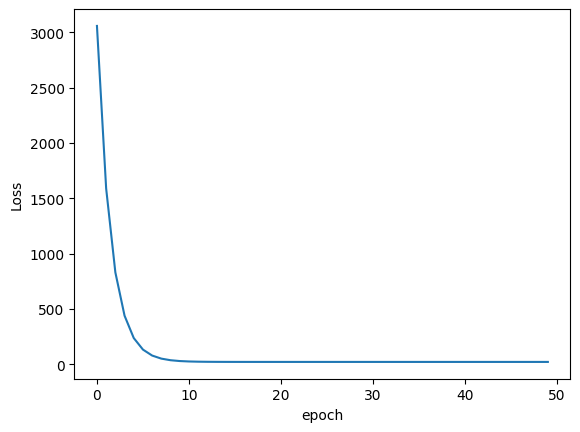

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [9]:

# Automatically determine x-range
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1

In [10]:

torch.save(model.state_dict(),'Tharika S.pt')